#Apresentação

O [Terrier](http://terrier.org/) é uma ferramenta open source de Recuperação de Informações desenvolvida pela Universidade de Glasgow. Além das funcionalidades básicas de indexação e consulta, o Terrier implementa várias técnicas do estado da arte de melhoria de desempenho. Nessa disciplina, iremos usar o PyTerrier, uma API em Python para o Terrier.
Documentação em https://pyterrier.readthedocs.io/_/downloads/en/latest/pdf/


## Instalação do PyTerrier


In [ ]:
!pip install python-terrier
#!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.4/347.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py

## Init

É necessário executar `pt.init()` para poder usar as funções do PyTerrier

Argumentos Opcionais:    
 - `version` - terrier IR version e.g. "5.2"    
 - `mem` - megabytes allocated to java e.g. "4096"      
 - `packages` - external java packages for Terrier to load e.g. ["org.terrier:terrier.prf"]
 - `logging` - logging level for Terrier. Defaults to "WARN", use "INFO" or "DEBUG" for more output.


In [ ]:
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.9 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.10.1 has loaded Terrier 5.9 (built by craigm on 2024-05-02 17:40) and terrier-helper 0.0.8



#Coleção de teste

Iremos utilizar a coleção de documentos Glasgow Herald que possui todas as notícias desse jornal no ano de 1995. Os documentos estão no formato TREC armazenados em arquivos em texto puro. São 311 arquivos que ocupam 150 MBytes. Cada arquivo refere-se a um dia do jornal e contém vários documentos (cada notícia é um documento). Há um total de 56.472 documentos/notícias na coleção. Os nomes dos arquivos indicam o ano, mês e dia da edição do jornal. Os arquivos possuem a extensão `sgml` que é uma linguagem de marcação que utiliza tags para indicar as diferentes seções dos documentos.

Você pode baixar os arquivos deste [link](https://www.inf.ufrgs.br/~viviane/DS/GH95.zip)

Exemplo de um documento:


```
<DOC>
<DOCNO>GH950114-000049</DOCNO>
<DOCID>GH950114-000049</DOCID>
<DATE>950114</DATE>
<HEADLINE>Argos sales power ahead</HEADLINE>
<EDITION>3</EDITION>
<PAGE>21</PAGE>
<RECORDNO>980369555</RECORDNO>
<TEXT>
ARGOS, which is breaking new ground with involvement in the power generators'
privatisation share sale, yesterday revealed a healthy sales boost in the
run-up to Christmas. The catalogue-shopping chain said pre-Christmas trading
had been 17% better than in 1993, while there had been a steady growth of 6% in
sales during the whole of last year on a comparable basis. An increase in store
openings led to overall sales 13% above the \#1100m worth of turnover achieved
in 1993. Chairman David Donne said: ''This strong performance reflects our
strategy of providing the consumer with a wide range of competitively priced
merchandise, supported with more catalogues and a successful advertising and
promotions programme.'' Argos, which has been chosen as a share shop for the
PowerGen and National Power share offer, will be announcing its results for
1994 on Monday, March 20.
</TEXT>
</DOC>


In [ ]:
!!pip install wget

['Requirement already satisfied: wget in /usr/local/lib/python3.10/dist-packages (3.2)']

In [ ]:
!wget -q -O GH95.zip https://www.inf.ufrgs.br/~viviane/DS/GH95.zip
!mkdir GH95
!unzip -q GH95.zip -d GH95

In [ ]:
#coleção Glasgow Herald
#files vai ter a lista de arquivos que devem ser indexados
files = pt.io.find_files("/content/GH95/docs")


# Indexação com o PyTerrier

Mais exemplos em (https://github.com/terrier-org/pyterrier).



## Indexando arquivos no formato TREC

Iremos indexar a coleção do jornal Glasgow Herald com notícias pulicadas em 1995.
Para indexar arquivos TXT, PDF, Microsoft Word, deve-se usar pt.FilesIndexer em vez de pt.TRECCollectionIndexer

Criar o objeto `pt.TRECCollectionIndexer`     
INDEX_DIR especifica aonde salvar o índice


In [ ]:
INDEX_DIR='/content/drive/MyDrive/Colab Notebooks/GH95' #diretório aonde o índice vai ficar
indexer = pt.TRECCollectionIndexer(INDEX_DIR,
    # vamos salvar o texto como metadados
    meta= {'docno' : 26, 'text' : 2048},
    # The tags from which to save the text. ELSE is special tag name, which means anything not consumed by other tags.
    meta_tags = {'text' : 'ELSE'},
    verbose=True,
    overwrite=True) #para sobrescrever, caso já tenha um índice com aquele nome
indexref = indexer.index(files)
#Indexando os arquivos -- chamando o método index no objeto TRECCollectionIndexer
index = pt.IndexFactory.of(indexref)

  0%|          | 0/311 [00:00<?, ?files/s]

Por default, o PyTerrier aplica stemming (Porter) e remoção de stopwords (tudo para inglês). Podemos não fazer stemming (`stemmer=None`) ou fazer stemming para outro idioma  (`stemmer='portugese'` -- sim, está escrito errado) e também manter as stopwords (`stopwords=None`).


##Inspecionando o índice:

IndexRef representa um objeto [IndexRef](http://terrier.org/docs/current/javadoc/org/terrier/querying/IndexRef.html). Pode ser visto como um ponteiro ou URI que aponta para o local do arquivo de índice.

In [ ]:
indexref.toString()

'/content/drive/MyDrive/Colab Notebooks/GH95/data.properties'

`index.getCollectionStatistics().toString()` fornece informações sobre o índice tais como o número de documentos indexados e o número de termos distintos.

In [ ]:
index = pt.IndexFactory.of(indexref)
print(index.getCollectionStatistics().toString())

Number of documents: 56472
Number of terms: 119803
Number of postings: 9085575
Number of fields: 0
Number of tokens: 13233703
Field names: []
Positions:   false



In [ ]:
# para ver os campos do meta-índice
print(index.getMetaIndex().getKeys())


['docno', 'text']


In [ ]:
# Se necessário, podemos imprimir todo o vocabulário para ver os termos indexados
#for kv in index.getLexicon():
 # print("%s (%s) -> %s (%s)" % (kv.getKey(), type(kv.getKey()), kv.getValue().toString(), type(kv.getValue()) ) )

In [ ]:
#lista os termos do doc 10
di = index.getDirectIndex()
doi = index.getDocumentIndex()
lex = index.getLexicon()
docid = 50 #docids começam a ser contatos no zero
#NB: a lista de postings é nula se o documento está vazio
for posting in di.getPostings(doi.getDocumentEntry(docid)):
  termid = posting.getId()
  lee = lex.getLexiconEntry(termid)
  print(lee.getKey(), end=' ')

govern return move end line can action transport set part goe act stephen reach job sai look soon scotland new made public come servic run loss last receiv attack privat claim industri bad railwai time carri will base involv be mean haul target peopl journei visit mai includ henri back year travel connect lead london onli next take busi affect current car scottish face night standard keith british review edinburgh aberdeen seek 3 number yesterdai confirm crisi badli parti now month england cash ian fresh grant emerg monei result plan recent disappoint road futur reduc power found chairman special 000 announc begin level nation inver damag option perth south central rail 20 brown packer oper summer clear judici ad glasgow holidai correspond 600 potenti withdrawn sold substanti hill fort william bitterli border union suffer mr aim sell proceed director privatis consider process inevit minist comment impact legal belt board labour minimum lawyer destin mainli traffic withdraw spokesman ce

In [ ]:
#lista as frequencias dos termos no doc 10
di = index.getDirectIndex()
doi = index.getDocumentIndex()
lex = index.getLexicon()
docid = 50 #docids começam a ser contatos no zero
#OBS: a lista de postings será nula se o documento estiver vazio
for posting in di.getPostings(doi.getDocumentEntry(docid)):
  termid = posting.getId()
  lee = lex.getLexiconEntry(termid)
  print("%s with frequency %d" % (lee.getKey(),posting.getFrequency()))




govern with frequency 4
return with frequency 1
move with frequency 1
end with frequency 3
line with frequency 1
can with frequency 1
action with frequency 1
transport with frequency 2
set with frequency 1
part with frequency 1
goe with frequency 1
act with frequency 2
stephen with frequency 1
reach with frequency 1
job with frequency 3
sai with frequency 1
look with frequency 1
soon with frequency 1
scotland with frequency 4
new with frequency 1
made with frequency 1
public with frequency 1
come with frequency 1
servic with frequency 11
run with frequency 1
loss with frequency 2
last with frequency 2
receiv with frequency 1
attack with frequency 1
privat with frequency 2
claim with frequency 1
industri with frequency 1
bad with frequency 1
railwai with frequency 2
time with frequency 1
carri with frequency 1
will with frequency 8
base with frequency 1
involv with frequency 1
be with frequency 2
mean with frequency 1
haul with frequency 1
target with frequency 1
peopl with frequency 1


In [ ]:
#quais documentos contêm o termo e com qual frequência
meta = index.getMetaIndex()
inv = index.getInvertedIndex()
le = lex.getLexiconEntry( "flower" )
# the lexicon entry is also our pointer to access the inverted index posting list
for posting in inv.getPostings( le ):
  docno = meta.getItem("docno", posting.getId())
  print("%s with frequency %d " % (docno, posting.getFrequency()))

GH950104-000060 with frequency 2 
GH950105-000016 with frequency 1 
GH950105-000048 with frequency 2 
GH950105-000102 with frequency 4 
GH950106-000097 with frequency 1 
GH950107-000182 with frequency 1 
GH950107-000188 with frequency 1 
GH950109-000059 with frequency 5 
GH950109-000060 with frequency 1 
GH950110-000103 with frequency 1 
GH950112-000017 with frequency 1 
GH950112-000090 with frequency 1 
GH950113-000019 with frequency 1 
GH950113-000067 with frequency 1 
GH950114-000042 with frequency 6 
GH950114-000074 with frequency 1 
GH950114-000085 with frequency 1 
GH950114-000087 with frequency 1 
GH950114-000089 with frequency 2 
GH950114-000092 with frequency 3 
GH950114-000093 with frequency 3 
GH950114-000095 with frequency 1 
GH950114-000125 with frequency 1 
GH950116-000054 with frequency 1 
GH950117-000007 with frequency 3 
GH950117-000057 with frequency 1 
GH950117-000080 with frequency 2 
GH950117-000090 with frequency 2 
GH950118-000009 with frequency 1 
GH950118-00007

#Realizando Consultas

## Consultas Interativas

###Terrier Query Language

[Fonte](http://terrier.org/docs/v1.1.1/terrier_develop.html)

Terrier offers a flexible and powerful query language for searching with phrases, fields, or specifying that terms are required to appear in the retrieved documents. Some examples of queries are the following:
* term1 term2 	retrieves documents that contains 1 or more term1 and term2 (they need not contain both)
* +term1 +term2	retrieves documents that contain both term1 and term2.
* +term1 -term2	retrieves documents that contain term1 and do not contain term2.




Várias funções de ranking implementadas (`wmodel`), incluindo  TF_IDF, PL2, DFR. A lista completa está em http://terrier.org/docs/current/javadoc/org/terrier/matching/models/package-summary.html

In [ ]:
br = pt.BatchRetrieve(index, metadata=["docno", "text"], wmodel="LemurTF_IDF")
br.search("+flower +internet")

,qid,docid,docno,text,rank,score,query
0,1,50459,GH951117-000057,GH951117-000057 951117 Net sales KIRSTY SCO...,0,71.420207,+flower +internet
1,1,44205,GH951012-000087,GH951012-000087 951012 Poeticjustice ALEXAN...,1,61.018838,+flower +internet
2,1,52622,GH951202-000019,GH951202-000019 951202 Artists in cyberspace...,2,54.274457,+flower +internet
3,1,33910,GH950811-000001,GH950811-000001 950811 End of long tour for ...,3,46.148712,+flower +internet
4,1,27261,GH950626-000085,GH950626-000085 950626 In a class of their o...,4,46.092561,+flower +internet
5,1,32654,GH950802-000088,GH950802-000088 950802 Global warming questi...,5,44.277723,+flower +internet
6,1,52803,GH951202-000200,GH951202-000200 951202 Whisky goes to your h...,6,42.989188,+flower +internet
7,1,23898,GH950603-000126,GH950603-000126 950603 Special treat as aunt...,7,33.670288,+flower +internet
8,1,29175,GH950708-000167,GH950708-000167 950708 Putting the biteon in...,8,32.408504,+flower +internet
9,1,37049,GH950830-000106,GH950830-000106 950830 Working to broaden ar...,9,32.271183,+flower +internet


##Consultas em Lote

Para avaliar a qualidade de um sistema de IR, é necessário rodar um número significativo de consultas (i.e., pelo menos 30) e calcular as métricas de avalição para as mesmas. As consultas utilizadas em campanhas de avaliação são comumente chamadas de **tópicos**. Um tópico é representado por uma estrutura que possui um número de identificação, um título, uma descrição e uma narrativa. O título é uma descrição bastante sucinta do tópico. A descrição fornece um pouco mais de detalhe e a narrativa auxilia as pessoas que produzem os julgamentos de relevância a distinguir documentos relevantes de não relevantes.
A seguir, apresentamos um exemplo de tópico:



```
<top>
<num> 254 </num>
<title> Earthquake Damage <title>
<desc> Find documents describing damage to property or persons caused by an earthquake and specifying the area affected. <desc>
<narr> Relevant documents will provide details on damage to buildings and material goods or injuries to people as a result of an earthquake. The geographical location (e.g. country, region, city) affected by the earthquake must also be mentioned. <narr>
</top>

```


In [ ]:
#arquivo com os tópicos de consulta
topicsFile = '/content/GH95/tops_qrels/topicos05.txt'
topics = pt.io.read_topics(topicsFile)
print(topics)

    qid                                    query
0   251                     alternative medicine
1   252                pension schemes in europe
2   253             countries with death penalty
3   254                        earthquake damage
4   255                         internet junkies
5   256                creutzfeldt jakob disease
6   257          ethnic cleansing in the balkans
7   258                       brain drain impact
8   259                              golden bear
9   260                 anti smoking legislation
10  261                          fortune telling
11  262                         benefit concerts
12  263             football refereeing disputes
13  264        smuggling of radioactive material
14  265                  deutsche bank takeovers
15  266  discrimination against european gypsies
16  267              best foreign language films
17  268                 human cloning and ethics
18  269                      treaty ratification
19  270             

In [ ]:
#recuperando documentos com o bm25
bm25 = pt.BatchRetrieve(index, wmodel="BM25",num_results=100) #o default é recuperar 1000 docs, mas podemos mudar com num_results
#bm25 = pt.BatchRetrieve(index, wmodel="BM25")
resbm25 = bm25.transform(topics)
#analisando a lista de documentos recuperados para cada consulta
resbm25

,qid,docid,docno,rank,score,query
0,251,12044,GH950321-000003,0,21.334470,alternative medicine
1,251,11431,GH950316-000151,1,19.284507,alternative medicine
2,251,20226,GH950511-000141,2,16.696155,alternative medicine
3,251,3226,GH950126-000087,3,16.393692,alternative medicine
4,251,45083,GH951017-000149,4,15.538279,alternative medicine
...,...,...,...,...,...,...
4995,300,4886,GH950207-000085,95,13.848310,lottery winnings
4996,300,14076,GH950401-000143,96,13.840559,lottery winnings
4997,300,22863,GH950527-000134,97,13.818081,lottery winnings
4998,300,56213,GH951229-000037,98,13.792275,lottery winnings


#Avaliando o resultado das consultas
Para avaliar quão bem o sistema de IR respondeu as consultas, é necessário conhecer as respostas “esperadas”, conhecidas como julgamentos de relevância. A lista de documentos que deveriam ter sido recuperados para o conjunto de consultas do arquivo topicos.txt está no arquivo **qrels_GH05.txt**. Um pequeno trecho deste arquivo é ilustrado abaixo. O trecho mostra documentos que foram avaliados para o tópico de consulta 251. O documento GH950126-000087 foi considerado relevante para esta consulta (o que é indicado pelo número 1 na última coluna).

```

251 0 GH950107-000074 0
251 0 GH950114-000076 0
251 0 GH950124-000109 0
251 0 GH950126-000087 1
251 0 GH950202-000076 0
251 0 GH950206-000123 0
251 0 GH950208-000060 0


In [ ]:
#arquivo com os julgamentos de relevância
qrelsFile = '/content/GH95/tops_qrels/qrels_GH05.txt'
qrels = pt.io.read_qrels(qrelsFile)

##Métricas de avaliação
Conforme vimos em aula, há diversas métricas para avaliar a qualidade do resultado de um sistema de RI. A Mean Average Precision (MAP) é uma das mais importantes. Adicionalmente, também podemos olhar para a precisão em diversos pontos do ranking como a P@1, P@10, etc.
Para listar as métricas implementadas use `ir_measures.parse_trec_measure('official') `

In [ ]:
from pyterrier.measures import *
# avaliando o resultado das consultas em termos de MAP, P@1, P@5 e P@10
pt.Utils.evaluate(resbm25, qrels, metrics = ['map','P_1','P_5','P_10']) #média para todas as consultas


<ipython-input-31-e207b969e8a2>:3: DeprecationWarning: Call to deprecated function (or staticmethod) evaluate. (Use pt.Evaluate instead) -- Deprecated since version 0.9.
  pt.Utils.evaluate(resbm25, qrels, metrics = ['map','P_1','P_5','P_10']) #média para todas as consultas


{'map': 0.3406616537822879,
 'P_1': 0.48,
 'P_5': 0.38,
 'P_10': 0.32199999999999995}

In [ ]:
ir_measures.parse_trec_measure('official')

skipped ['gm_map']: measures not yet supported


[P@5,
 P@10,
 P@15,
 P@20,
 P@30,
 P@100,
 P@200,
 P@500,
 P@1000,
 Rprec,
 Bpref,
 IPrec@0.0,
 IPrec@0.1,
 IPrec@0.2,
 IPrec@0.3,
 IPrec@0.4,
 IPrec@0.5,
 IPrec@0.6,
 IPrec@0.7,
 IPrec@0.8,
 IPrec@0.9,
 IPrec@1.0,
 AP,
 NumQ,
 NumRel,
 NumRet(rel=1),
 NumRet,
 RR]

In [ ]:
#visualizando o resultado da MAP por consulta
pt.Utils.evaluate(resbm25, qrels, metrics = ['map'], perquery=True)

<ipython-input-32-7b01f7d5b34a>:2: DeprecationWarning: Call to deprecated function (or staticmethod) evaluate. (Use pt.Evaluate instead) -- Deprecated since version 0.9.
  pt.Utils.evaluate(resbm25, qrels, metrics = ['map'], perquery=True)


defaultdict(dict,
            {'251': {'map': 0.2622821026046833},
             '252': {'map': 0.3032706776956243},
             '253': {'map': 0.20678569386195741},
             '254': {'map': 0.6582023614043317},
             '255': {'map': 0.0},
             '256': {'map': 0.7591911764705882},
             '257': {'map': 0.2349379617845418},
             '258': {'map': 0.0},
             '259': {'map': 0.5},
             '260': {'map': 0.5},
             '261': {'map': 0.00101010101010101},
             '262': {'map': 0.08765770105895498},
             '263': {'map': 0.1911855884618998},
             '264': {'map': 0.3333333333333333},
             '265': {'map': 0.3120300751879699},
             '266': {'map': 0.08496732026143791},
             '267': {'map': 0.0},
             '268': {'map': 0.0},
             '269': {'map': 0.06666666666666667},
             '270': {'map': 0.5213675213675214},
             '271': {'map': 0.29777777777777775},
             '272': {'map': 0.0833333

## Curvas de Precisão/Revocação
Gerando os valores de precisão interpolada nos níveis de revocação padrão para poder desenhar a curva de precisão-revocação

In [ ]:
iprec = pt.Utils.evaluate(resbm25, qrels, metrics = [IPrec@0.0,IPrec@0.1,IPrec@0.2,IPrec@0.3,IPrec@0.4,IPrec@0.5,IPrec@0.6,IPrec@0.7,IPrec@0.8,IPrec@0.9,IPrec@1.0])
iprec.values()

<ipython-input-21-a5ad1c7394d5>:1: DeprecationWarning: Call to deprecated function (or staticmethod) evaluate. (Use pt.Evaluate instead) -- Deprecated since version 0.9.
  iprec = pt.Utils.evaluate(resbm25, qrels, metrics = [IPrec@0.0,IPrec@0.1,IPrec@0.2,IPrec@0.3,IPrec@0.4,IPrec@0.5,IPrec@0.6,IPrec@0.7,IPrec@0.8,IPrec@0.9,IPrec@1.0])


dict_values([0.6196567907352722, 0.5711584002368817, 0.519693660373165, 0.45626318675924815, 0.3886638430161778, 0.3675208371858952, 0.2932719381365988, 0.25277874644920145, 0.18292122218728252, 0.13992016997073148, 0.11906173688652524])

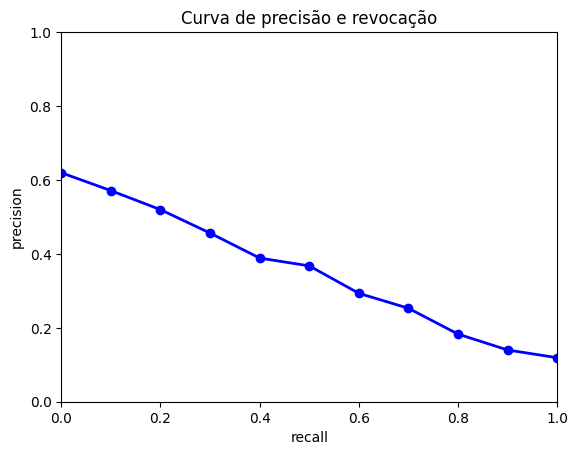

In [ ]:
import matplotlib.pyplot as plt
x=[0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y=iprec.values()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Curva de precisão e revocação")
plt.plot(x,y,'bo-', linewidth=2)
plt.show()


#Realizando experimentos comparativos
Saber o resultado das métricas para uma configuração experimental só não é suficiente. Na maioria dos casos, o objetivo é comparar configurações diferentes. Nesse caso, usaremos pt.Experiment() para comparar 4 funções de ranking: Tf, TF-IDF, BM25 e PL2.
Mais detalhes em https://pyterrier.readthedocs.io/en/latest/experiments.html.

In [ ]:
tf = pt.BatchRetrieve(index, wmodel="Tf")
tfidf = pt.BatchRetrieve(index, wmodel="LemurTF_IDF")
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
pl2 = pt.BatchRetrieve(index, wmodel="PL2")

#Analisando os valores de MAP para o conjunto de consultas
pt.Experiment([tf, tfidf, bm25, pl2], topics, qrels, eval_metrics=["map"],perquery=False,round=4)

,name,map
0,BR(Tf),0.1333
1,BR(LemurTF_IDF),0.3409
2,BR(BM25),0.3522
3,BR(PL2),0.3372


##Teste de significância estatística
Para saber se de fato uma configuração é melhor do que a outra, iremos fazer ttestes estatísticos.
Podemos definir que uma das execuções é a *baseline* e fazemos o teste de significância estatística (teste-T) comparando as demais execuções em relação à baseline.

In [ ]:
#baseline = 0 indica que o primeiro resultado (Tf) é o baseline
pt.Experiment([tf, tfidf, bm25, pl2], topics, qrels, eval_metrics=["map",'P_5'], round=4, baseline=0)


,name,map,P_5,map +,map -,map p-value,P_5 +,P_5 -,P_5 p-value
0,BR(Tf),0.1333,0.172,NaN,NaN,NaN,NaN,NaN,NaN
1,BR(LemurTF_IDF),0.3409,0.384,37.0,9.0,8.845608e-08,28.0,3.0,0.000010
2,BR(BM25),0.3522,0.380,39.0,7.0,4.664423e-08,27.0,3.0,0.000009
3,BR(PL2),0.3372,0.384,39.0,7.0,2.949766e-08,28.0,3.0,0.000005


a coluna "p-value" mostra o resultado do teste estatístico. Podemos ver que todos os métodos são significativamente melhores do que o baseline(Tf) tanto em termos de MAP como em termos de P@5, pois os p-values foram todos menores do que 0.05.

In [ ]:
#baseline = 1 indica que o segundo resultado (TF_IDF) é o baseline
pt.Experiment([tf, tfidf, bm25, pl2], topics, qrels, eval_metrics=["map","P_5"], round=4, baseline=1)


,name,map,P_5,map +,map -,map p-value,P_5 +,P_5 -,P_5 p-value
0,BR(Tf),0.1333,0.172,9.0,37.0,8.845608e-08,3.0,28.0,0.000010
1,BR(LemurTF_IDF),0.3409,0.384,NaN,NaN,NaN,NaN,NaN,NaN
2,BR(BM25),0.3522,0.380,29.0,15.0,1.160432e-01,5.0,6.0,0.766392
3,BR(PL2),0.3372,0.384,25.0,21.0,7.646552e-01,7.0,7.0,1.000000


Já, em comparação com o TF_IDF, temos que o Tf foi significativmente pior mas não houve diferença significativa entre TF_IDF e BM25 ou TF_IDF e PL2.

###Exercício:
Fazer um experimento avaliativo com a coleção Glasgow Herald.
Possibilidades:
*   Avaliar o impacto do uso de stemming
*   Avaliar o impacto de diferentes funções de ranking
*   Avaliar o impacto de diferentes formulações da consulta (ex: acrescentar a descrição)
*   ...

**Requisitos**
*   Calcular as métricas de avaliação adequadas
*   Fazer teste estatístico
*   Desenhar as curvas de precisão e revocação (todas em um mesmo plot)
*   Resumir as principais constatações


In [ ]:
#seu código aqui

Sua análise aqui